In [66]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
import cv2
from IPython.display import display
import time

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
tf.gfile = tf.io.gfile

%run ../utils/object_detection_utils.ipynb
%run ../utils/image_utils.ipynb

ROOT = "/mnt/nvme-storage/pfauregi"

# Loading sample image

In [2]:
sample = load_image(os.path.join(ROOT,"datasets/micro_samples/sample_04.tiff"))

# Detection

In [3]:
path_to_detection_model = os.path.join(ROOT,"training/obj_detection/ws_bd/models/model/export/saved_model/")
path_to_labels = os.path.join(ROOT,"artificial_datasets/dataset01_tfr/binary_label_map.pbtxt")

In [4]:
# Model
detection_model = tf.saved_model.load(path_to_detection_model)
detection_model = detection_model.signatures['serving_default']
# Label map
category_index = label_map_util.create_category_index_from_labelmap(path_to_labels, use_display_name=True)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
detection_results = run_inference_for_single_image(detection_model, sample)

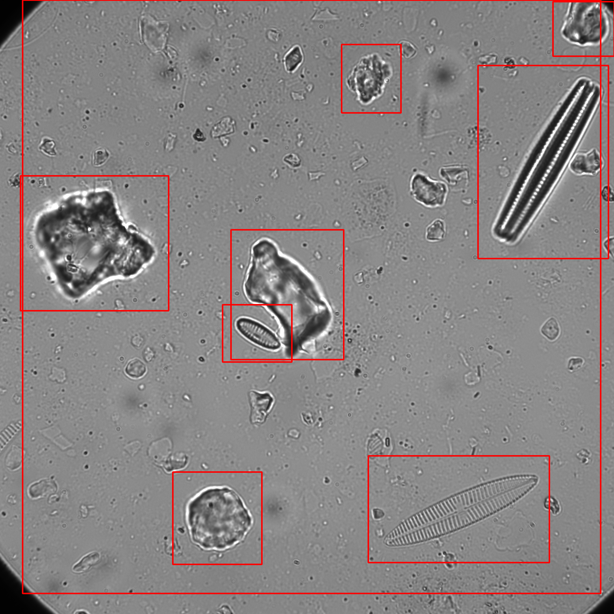

In [67]:
#xwidth, yheight
verbose = True
score_thresold = 0.95

thumbails = []
image_detections = sample.copy()
height, width, channels = image_detections.shape
for box, score in zip(detection_results['detection_boxes'], detection_results['detection_scores']):
    if score>score_thresold:
        ymin, xmin, ymax, xmax = int(box[0]*width), int(box[1]*height), int(box[2]*width), int(box[3]*height)
        if verbose: image_detections = cv2.rectangle(image_detections, (xmin, ymin), (xmax, ymax), (255, 0, 0), 4)
        thumbail = sample[ymin:ymax, xmin:xmax, :]
        thumbail = convert_to_square(thumbail, new_size=256)
        thumbails.append(thumbail)
thumbails = np.array(thumbails)
if verbose: display(Image.fromarray(image_detections).resize((int(0.3*width), int(0.3*height))))

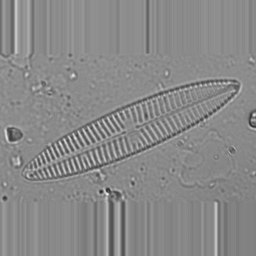

In [70]:
display(Image.fromarray(thumbails[0]))

# Classification

In [40]:
sample(:4, 5:6, :)

SyntaxError: invalid syntax (<ipython-input-40-c98ee032a2f2>, line 1)